## Implement Simple Linear Regression in Python


In this example, we will use the salary data concerning the experience of employees. In this dataset, we have two columns YearsExperience and Salary

We need Pandas for data manipulation, NumPy for mathematical calculations, and MatplotLib, and Seaborn for visualizations. Sklearn libraries are used for machine learning operations

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

We download the dataset from kaggle and upload it to our notebook and read it into the pandas dataframe.

In [2]:
# Get dataset
df_sal = pd.read_csv('data/Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Now that we have our data ready, let's analyze and understand its trend in detail. To do that we can first describe the data below 

In [3]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


We can find how the data is distributed visually using Seaborn distplot

/Users/sarah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


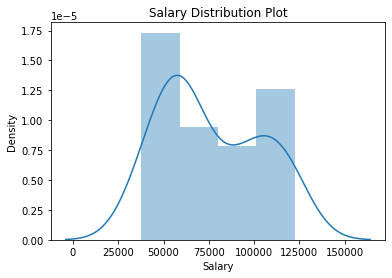

In [4]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

A distplot or distribution plot shows the variation in the data distribution. 
It represents the data by combining a line with a histogram.
Then we check the relationship between Salary and Experience

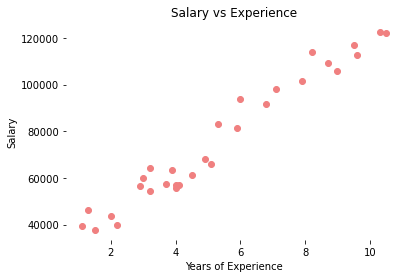

In [5]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

Now, we are going yo split the dataset into dependent/independent variables

In [21]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

In [24]:
X, y = X.values, y.values

Moreover, we use train_test_split to divide your data into training (80%) and test (20%) sets.

In [25]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

## Visualize predictions

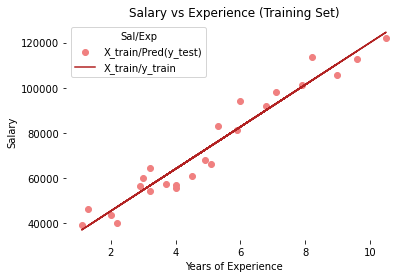

In [29]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [71]:
regressor_ridge = KernelRidge(kernel='polynomial', alpha=0.2, degree=2)
regressor_ridge.fit(X_train, y_train)

KernelRidge(alpha=0.2, degree=2, kernel='polynomial')

In [72]:
y_pred_test_ridge = regressor_ridge.predict(X_test)     # predicted value of y_test
y_pred_train_ridge = regressor_ridge.predict(X_train)   # predicted value of y_train

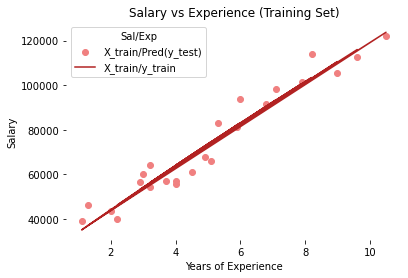

In [73]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train_ridge, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()